In [30]:

# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from gensim.corpora import Dictionary
from gensim.models import LdaModel, TfidfModel, Nmf, LsiModel
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models

In [31]:

# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from gensim.corpora import Dictionary
from gensim.models import LdaModel, TfidfModel, Nmf, LsiModel
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models

In [32]:

# Загрузка данных
# Здесь мы предполагаем, что данные находятся в CSV файле под именем "data.csv"
# и содержат колонку 'text', в которой находятся текстовые данные

dataset = pd.read_csv('compiled_texts_dataset.csv')
texts = dataset['texts'].dropna().tolist()


In [33]:

# Подготовка данных для моделирования
processed_texts = [text.lower().split() for text in texts]
dictionary = Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

In [34]:

# Тематическое моделирование с использованием LDA (Latent Dirichlet Allocation)
n_topics = 3
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=n_topics, random_state=42, passes=10)

In [35]:

# Вывод тем LDA
print("LDA Темы:")
for idx, topic in lda_model.print_topics(num_topics=n_topics, num_words=10):
    print(f"Тема {idx + 1}: {topic}")

LDA Темы:
Тема 1: 0.022*"в" + 0.010*"с" + 0.009*"и" + 0.008*"на" + 0.006*"что" + 0.006*"не" + 0.006*"которые" + 0.005*"из" + 0.005*"—" + 0.005*"его"
Тема 2: 0.019*"на" + 0.018*"в" + 0.013*"и" + 0.008*"—" + 0.007*"ученые" + 0.006*"для" + 0.006*"из" + 0.005*"с" + 0.005*"по" + 0.004*"свет"
Тема 3: 0.027*"в" + 0.015*"и" + 0.011*"на" + 0.008*"у" + 0.006*"по" + 0.006*"–" + 0.005*"с" + 0.005*"ученые" + 0.005*"из" + 0.005*"как"


In [36]:

# Оценка когерентности LDA
lda_coherence_model = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
lda_coherence = lda_coherence_model.get_coherence()
print(f"Когерентность LDA: {lda_coherence}")

Когерентность LDA: 0.2297103940855433


In [37]:

# Визуализация с использованием pyLDAvis
# Визуализация с использованием pyLDAvis
pyLDAvis.enable_notebook()
lda_vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)
# pyLDAvis.save_html(lda_vis, 'lda_visualization.html')
# print("Визуализация LDA сохранена в файл 'lda_visualization.html'")

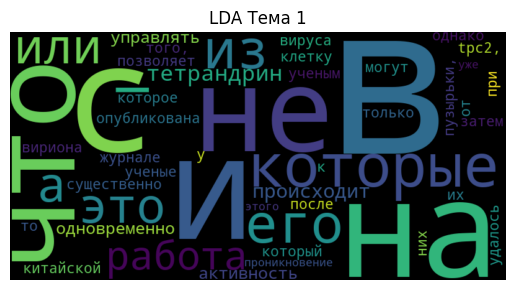

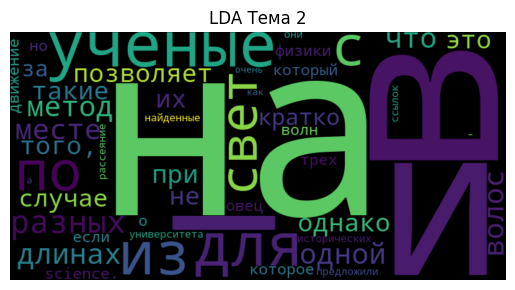

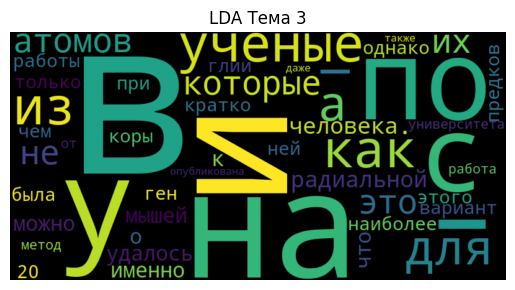

In [38]:

# Визуализация тем LDA с использованием облака слов
for idx in range(n_topics):
    topic_terms = dict(lda_model.show_topic(idx, 50))
    wordcloud = WordCloud(width=800, height=400, max_words=50).generate_from_frequencies(topic_terms)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"LDA Тема {idx + 1}")
plt.show()

In [39]:

# Определение, к какой теме относится каждый документ для каждого из методов
# LDA
print("\nПринадлежность документов к темам LDA:")
for i, bow in enumerate(corpus):
    topic_distribution = lda_model.get_document_topics(bow)
    topic = max(topic_distribution, key=lambda x: x[1])[0] + 1
    print(f"Документ {i + 1} относится к теме {topic}")



Принадлежность документов к темам LDA:
Документ 1 относится к теме 3
Документ 2 относится к теме 2
Документ 3 относится к теме 2
Документ 4 относится к теме 2
Документ 5 относится к теме 1
Документ 6 относится к теме 3
Документ 7 относится к теме 2
Документ 8 относится к теме 1
Документ 9 относится к теме 3
Документ 10 относится к теме 3


In [40]:

# Тематическое моделирование с использованием LSI (Latent Semantic Indexing)
lsi_model = LsiModel(corpus=corpus, id2word=dictionary, num_topics=n_topics)

d:\GitHub\homework_MUIV_iroli\venv\Lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in SciPy 1.14.0, and the `scipy.sparse.sparsetools` namespace will be removed in SciPy 2.0.0.
  sparsetools.csc_matvecs(


In [41]:

# Вывод тем LSI
print("\nLSI Темы:")
for idx, topic in lsi_model.print_topics(num_topics=n_topics, num_words=10):
    print(f"Тема {idx + 1}: {topic}")


LSI Темы:
Тема 1: 0.666*"в" + 0.298*"и" + 0.289*"на" + 0.150*"у" + 0.134*"из" + 0.122*"не" + 0.122*"—" + 0.120*"с" + 0.117*"ученые" + 0.111*"что"
Тема 2: -0.299*"на" + 0.275*"у" + -0.220*"с" + -0.181*"—" + 0.170*"радиальной" + 0.137*"человека." + 0.136*"мышей" + 0.125*"в" + -0.105*"из" + 0.102*"глии"
Тема 3: -0.198*"и" + -0.183*"на" + 0.166*"в" + 0.155*"его" + -0.151*"ученые" + 0.124*"тетрандрин" + 0.124*"происходит" + 0.116*"что" + -0.110*"по" + 0.110*"которые"


In [42]:

# Оценка когерентности LSI
lsi_coherence_model = CoherenceModel(model=lsi_model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
lsi_coherence = lsi_coherence_model.get_coherence()
print(f"Когерентность LSI: {lsi_coherence}")

Когерентность LSI: 0.4179212497882696


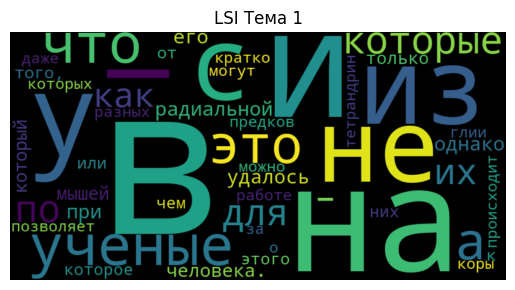

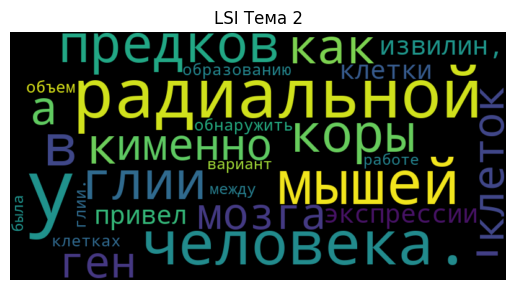

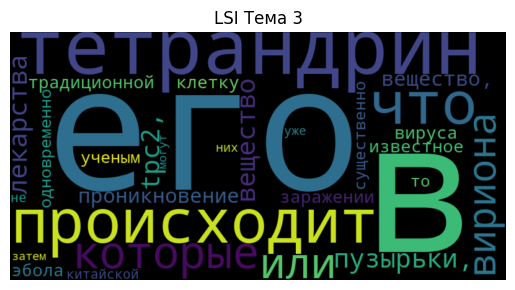

In [43]:

# Визуализация тем LSI с использованием облака слов
for idx in range(n_topics):
    topic_terms = dict(lsi_model.show_topic(idx, 50))
    wordcloud = WordCloud(width=800, height=400, max_words=50).generate_from_frequencies(topic_terms)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"LSI Тема {idx + 1}")
plt.show()

In [44]:

# LSI
print("\nПринадлежность документов к темам LSI:")
for i, bow in enumerate(corpus):
    topic_distribution = lsi_model[bow]
    topic = max(topic_distribution, key=lambda x: abs(x[1]))[0] + 1
    print(f"Документ {i + 1} относится к теме {topic}")



Принадлежность документов к темам LSI:
Документ 1 относится к теме 1
Документ 2 относится к теме 1
Документ 3 относится к теме 1
Документ 4 относится к теме 1
Документ 5 относится к теме 1
Документ 6 относится к теме 1
Документ 7 относится к теме 1
Документ 8 относится к теме 1
Документ 9 относится к теме 1
Документ 10 относится к теме 1


In [45]:

# Тематическое моделирование с использованием NMF (Non-negative Matrix Factorization)
tfidf = TfidfModel(corpus)
tfidf_corpus = tfidf[corpus]
nmf_model = Nmf(corpus=tfidf_corpus, id2word=dictionary, num_topics=n_topics, random_state=42)

d:\GitHub\homework_MUIV_iroli\venv\Lib\site-packages\gensim\models\nmf.py:578: DeprecationWarning: Please import `csc_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csc` namespace is deprecated and will be removed in SciPy 2.0.0.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
d:\GitHub\homework_MUIV_iroli\venv\Lib\site-packages\gensim\models\nmf.py:607: DeprecationWarning: Please import `csc_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csc` namespace is deprecated and will be removed in SciPy 2.0.0.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
d:\GitHub\homework_MUIV_iroli\venv\Lib\site-packages\gensim\models\nmf.py:620: DeprecationWarning: Please import `csc_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csc` namespace is deprecated and will be removed in SciPy 2.0.0.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


In [46]:

# Вывод тем NMF
print("\nNMF Темы:")
for idx, topic in nmf_model.print_topics(num_topics=n_topics, num_words=10):
    print(f"Тема {idx + 1}: {topic}")


NMF Темы:
Тема 1: 0.009*"волос" + 0.009*"месте" + 0.007*"атомов" + 0.007*"рассеяние" + 0.007*"найденные" + 0.006*"могут" + 0.006*"но" + 0.005*"именно" + 0.005*"какой" + 0.005*"быть"
Тема 2: 0.007*"свет" + 0.005*"длинах" + 0.005*"у" + 0.005*"радиальной" + 0.005*"движение" + 0.005*"овец" + 0.005*"его" + 0.004*"происходит" + 0.004*"тетрандрин" + 0.004*"трех"
Тема 3: 0.008*"управлять" + 0.008*"активность" + 0.007*"с" + 0.006*"метод" + 0.006*"насколько" + 0.006*"сказать," + 0.006*"страны" + 0.006*"стран" + 0.006*"пациентам" + 0.006*"иннервацию"


In [47]:

# Оценка когерентности NMF
nmf_coherence_model = CoherenceModel(model=nmf_model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
nmf_coherence = nmf_coherence_model.get_coherence()
print(f"Когерентность NMF: {nmf_coherence}")

Когерентность NMF: 0.46548912555735544


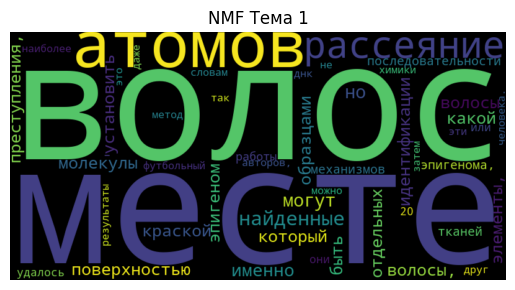

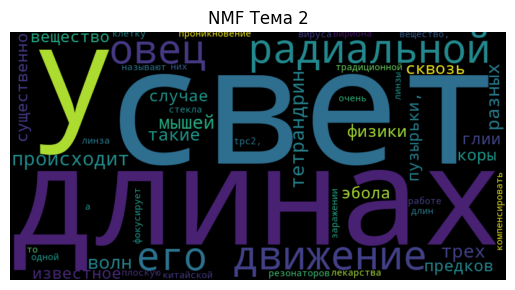

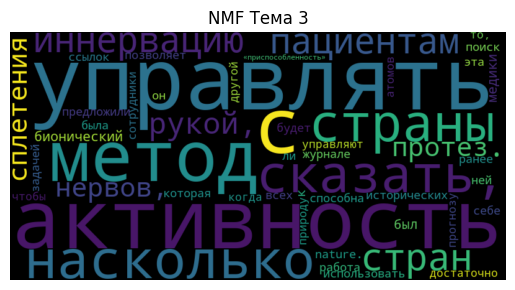

In [48]:

# Визуализация тем NMF с использованием облака слов
for idx in range(n_topics):
    topic_terms = dict(nmf_model.show_topic(idx, 50))
    wordcloud = WordCloud(width=800, height=400, max_words=50).generate_from_frequencies(topic_terms)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"NMF Тема {idx + 1}")
plt.show()

In [49]:

# NMF
print("\nПринадлежность документов к темам NMF:")
for i, bow in enumerate(tfidf_corpus):
    topic_distribution = nmf_model[bow]
    topic = max(topic_distribution, key=lambda x: x[1])[0] + 1
    print(f"Документ {i + 1} относится к теме {topic}")



Принадлежность документов к темам NMF:
Документ 1 относится к теме 2
Документ 2 относится к теме 2
Документ 3 относится к теме 1
Документ 4 относится к теме 2
Документ 5 относится к теме 3
Документ 6 относится к теме 3
Документ 7 относится к теме 3
Документ 8 относится к теме 2
Документ 9 относится к теме 1
Документ 10 относится к теме 1
